## Análisis exploratorio de la demanda

1-Explorar características de los pacientes.

2-Explorar relaciones entre las características de los pacientes.

3-Explorar consumos. Analizar su distribución

In [18]:
#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv('.\Data\Dataset_demanda.csv',sep=';')
df.head(2)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,2,0,0,"6,5"
1,100001,64,F,77,Titular,b,empresa_tipo_1,SI,1,0,0,8


In [10]:
df.describe()

,id_socio_encoded,edad_encoded,antiguedad_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,100961.500000,31.917360,29.399688,0.541060,0.322765,0.435551
std,555.555278,20.189223,21.565892,0.673299,0.648436,0.825683
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100480.750000,15.000000,11.000000,0.000000,0.000000,0.000000
50%,100961.500000,31.000000,25.000000,0.000000,0.000000,0.000000
75%,101442.250000,47.000000,44.000000,1.000000,1.000000,1.000000
max,101923.000000,85.000000,130.000000,5.000000,5.000000,7.000000


In [13]:
df[df.id_socio_encoded.duplicated()]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


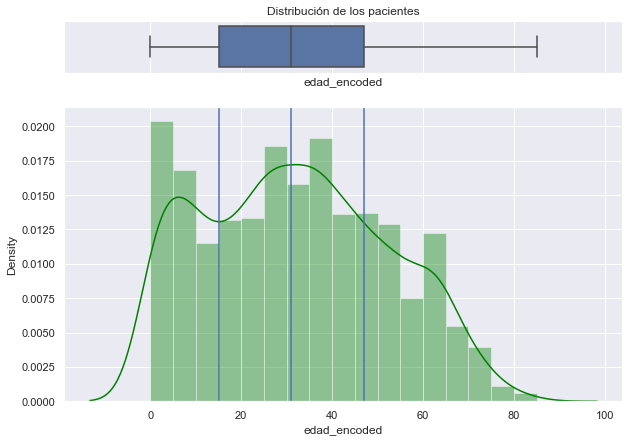

In [26]:
sns.set()

#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df.edad_encoded, ax=ax_box)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="green")

plt.axvline(df.edad_encoded.quantile(0.25))
plt.axvline(df.edad_encoded.quantile(0.50))
plt.axvline(df.edad_encoded.quantile(0.75))
 
ax_box.set_title("Distribución de los pacientes")
plt.show()


In [23]:
pd.DataFrame(df.edad_encoded.describe())

,edad_encoded
count,1924.000000
mean,31.917360
std,20.189223
min,0.000000
25%,15.000000
50%,31.000000
75%,47.000000
max,85.000000


Aparentemente el grupo mayor de pacientes se localiza entre los 0 y 5 años. Existen pocos pacientes despues de los 70 años.

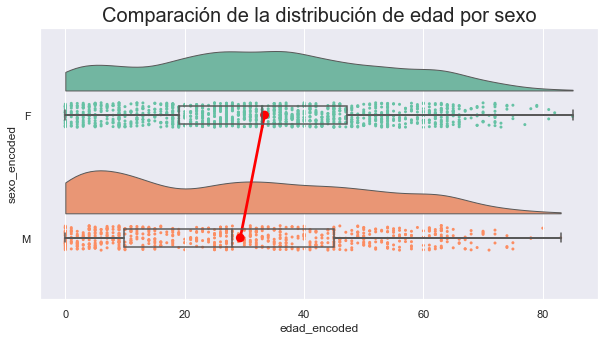

In [36]:
import ptitprince as pt

plt.figure(figsize=(10,5))

ax=pt.RainCloud(x = 'sexo_encoded', y = 'edad_encoded',orient='h', data = df, pointplot = True)

plt.title("Comparación de la distribución de edad por sexo",fontsize=20)

plt.show()

El promedio de edad es mayor para las mujeres que para los hombres.